In [ ]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%tensorflow_version 2.x
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# as the mnist dataset is already divided into training and testing 
# and we dont have to use train_test_split
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [ ]:
# getting the shape of the X_train
X_train.shape

(60000, 28, 28)

In [ ]:
# getting a single sample
single_image = X_train[0]

In [ ]:
single_image.shape

(28, 28)

In [ ]:
# seeing the image
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

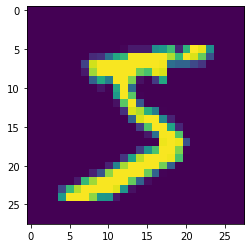

In [ ]:
# we can show the image by using imshow
plt.imshow(single_image)

In [ ]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
Y_train.shape

(60000,)

In [ ]:
# we have to change training dataset to categorical value
Y_example = to_categorical(Y_train) 

In [ ]:
Y_example.shape

(60000, 10)

In [ ]:
Y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
Y_cat_test  = to_categorical(Y_test,num_classes=10)
Y_cat_train = to_categorical(Y_train,10)

In [ ]:
#Y_cat_test.shape
Y_cat_train.shape

(60000, 10)

In [ ]:
# now we see that the values are between 0-255
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
single_image.max()

255

In [ ]:
single_image.min()

0

In [ ]:
# these are images and we cannot just use minmaxscaler to put values between 0 and 1
# so to put them between 1 and 0 we can just divide it by 255 
X_train = X_train/255

In [ ]:
X_test = X_test/255

In [ ]:
# now we get the scaled image with values between 0 and 1
scaled_image = X_train[0]

In [ ]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
scaled_image.max()

1.0

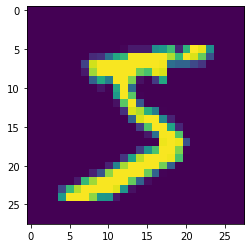

In [ ]:
# and the image has not changed because of that
plt.imshow(scaled_image)

In [ ]:
# we see that the shape of the training and testing data set is 3D
# so we have to change it to 4D because this image is gray bet could have been RGB
# and that would be 3
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [ ]:
# as the kenel size is 4,4 and the size of image is 28 
# when we divide we dont get a decimal digit hence we can say we dont need padding
28/4

7.0

In [ ]:
28*28

784

In [ ]:
# building model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
# softmax as it is multi class
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# getting a early stop
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [ ]:
from gc import callbacks
model.fit(X_train,Y_cat_train,epochs=10,validation_data=(X_test,Y_cat_test),
          callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0785 - accuracy: 0.9763 - val_loss: 0.0576 - val_accuracy: 0.9813
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0420 - accuracy: 0.9870 - val_loss: 0.0454 - val_accuracy: 0.9854
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0281 - accuracy: 0.9910 - val_loss: 0.0397 - val_accuracy: 0.9864
Epoch 4/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0187 - accuracy: 0.9938 - val_loss: 0.0399 - val_accuracy: 0.9859


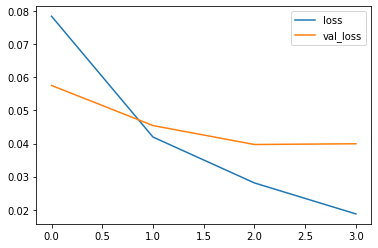

In [ ]:
metrics = pd.DataFrame(model.history.history)
metrics[['loss','val_loss']].plot()

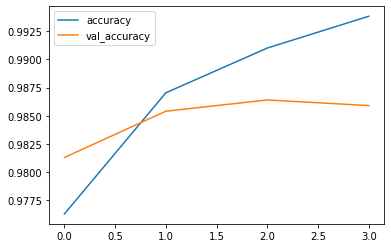

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate(X_test,Y_cat_test,verbose=0)

[0.03993310406804085, 0.9858999848365784]

In [ ]:
predictions = np.argmax(model.predict(X_test), axis=-1)

In [ ]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
Y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
confusion_matrix(Y_test,predictions)

array([[ 975,    0,    1,    1,    0,    1,    1,    0,    1,    0],
       [   0, 1129,    1,    2,    0,    0,    3,    0,    0,    0],
       [   3,    1, 1019,    2,    1,    0,    0,    3,    3,    0],
       [   0,    0,    3, 1003,    0,    3,    0,    1,    0,    0],
       [   0,    0,    1,    0,  977,    0,    2,    0,    0,    2],
       [   1,    0,    0,    5,    0,  885,    1,    0,    0,    0],
       [   4,    3,    0,    0,    1,    8,  940,    0,    2,    0],
       [   1,    1,    8,    3,    0,    0,    0, 1013,    1,    1],
       [   6,    0,    4,    5,    0,    5,    2,    1,  946,    5],
       [   3,    0,    1,    5,    9,   15,    0,    3,    1,  972]])

In [ ]:
my_number = X_test[0]

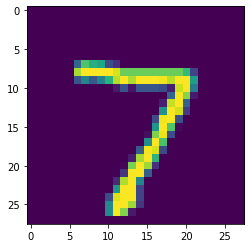

In [ ]:
plt.imshow(my_number.reshape(28,28))

In [ ]:
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=-1)

array([7])